In [ ]:
# importing needed packages

import re
import os
import spacy
import random 
import numpy as np
import pandas as pd
from glob import glob
from sklearn import svm 
from spacy import displacy
from textblob import TextBlob
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)

In [ ]:
paths_to_stories = glob(os.path.join(os.getcwd(),'stories//*.txt'))

In [ ]:
# Making Datframe for stories

df = pd.DataFrame()
df["story"] = ""

In [ ]:
# Reading contents

for i in paths_to_stories:
  f = open(i,"r")
  df.loc[len(df.index)] = f.read()

df

,story
0,There was once a young boy who had problem con...
1,"People have been coming to the wise man, compl..."
2,"Once, there were two brothers who lived at the..."
3,Once there was a Lion in the jungle who used t...
4,"A long time ago, a farmer had a duck, which la..."
5,A mother dog and her pups lived on a farm. \nO...
6,"Once upon a time, there was an old man who liv..."
7,Once there were two friends who were crossing ...
8,A lion was once sleeping in the jungle when a ...
9,"Once upon a time, in a desert far away, there ..."


In [ ]:
# Count Adjectives

def count_adj(text):
  doc = nlp(text)
  sum = 0
  for i in doc:
    if i.pos_ == 'ADJ':
      sum = sum+1
  return sum

In [ ]:
# Count Nouns

def count_noun(text):
  doc = nlp(text)
  sum = 0
  for i in doc:
    if i.pos_ == 'NOUN':
      sum = sum+1
  return sum

In [ ]:
# Count Verbs

def count_vrb(text):
  doc = nlp(text)
  sum = 0
  for i in doc:
    if i.pos_ == 'VERB':
      sum = sum+1
  return sum

In [ ]:
# Verb indeces

def verb_index(text):
  l = []
  c = 0
  doc = nlp(text)
  for i in doc:
    if i.pos_ == 'VERB':
      l.append(c)
    c = c + 1

  return l

In [ ]:
# Noun indeces

def noun_index(text):
  l = []
  c = 0
  doc = nlp(text)
  for i in doc:
    if i.pos_ == 'NOUN':
      l.append(c)
    c = c + 1
        
  return l

In [ ]:
# Adjective indeces

def adj_index(text):
  l = []
  c = 0
  doc = nlp(text)
  for i in doc:
    if i.pos_ == 'ADJ':
      l.append(c)
    c = c + 1
        
  return l

In [ ]:
# Noun dependencies

def noun_dep(text):
  D={}
  doc = nlp(text)

  for i in doc:
    if i.pos_ == 'NOUN':
      if i.head.pos_ in D.keys():
        D[i.head.pos_] = D[i.head.pos_]+1

      else:
        D[i.head.pos_]=1
        
  return D

In [ ]:
# Adj dependencies

def adj_dep(text):
  D={}
  doc = nlp(text)

  for i in doc:
    if i.pos_ == 'ADJ':
      if i.head.pos_ in D.keys():
        D[i.head.pos_] = D[i.head.pos_]+1

      else:
        D[i.head.pos_]=1
        
  return D

In [ ]:
# Verb dependencies

def verb_dep(text):
  D={}
  doc = nlp(text)

  for i in doc:
    if i.pos_ == 'VERB':
      if i.head.pos_ in D.keys():
        D[i.head.pos_] = D[i.head.pos_]+1

      else:
        D[i.head.pos_]=1
        
  return D

In [ ]:
# Counting Parts of Speeches and their indeces

df["no_NOUN"] = df["story"].apply(count_noun)
df["no_ADJ"] = df["story"].apply(count_adj)
df["no_VRB"] = df["story"].apply(count_vrb)
df["VRB_ind"] = df["story"].apply(verb_index)
df["ADJ_ind"] = df["story"].apply(adj_index)
df["NOUN_ind"] = df["story"].apply(noun_index)


# Checking Dependencies of nouns, adjectives and verbs
df["NOUN_dep"] = df["story"].apply(noun_dep)
df["ADJ_dep"] = df["story"].apply(adj_dep)
df["VERB_dep"] = df["story"].apply(verb_dep)


In [ ]:
df

,story,no_NOUN,no_ADJ,no_VRB,VRB_ind,ADJ_ind,NOUN_ind,NOUN_dep,ADJ_dep,VERB_dep
0,There was once a young boy who had problem con...,44,9,29,"[9, 16, 20, 22, 25, 30, 37, 47, 53, 74, 80, 95...","[4, 17, 54, 69, 70, 76, 106, 155, 189]","[5, 8, 11, 28, 31, 36, 40, 42, 45, 51, 56, 58,...","{'AUX': 5, 'VERB': 22, 'ADP': 13, 'NOUN': 4}","{'NOUN': 5, 'VERB': 2, 'ADP': 1, 'AUX': 1}","{'NOUN': 6, 'VERB': 21, 'PRON': 1, 'ADP': 1}"
1,"People have been coming to the wise man, compl...",15,9,13,"[3, 9, 21, 27, 39, 50, 55, 65, 71, 73, 76, 78,...","[6, 12, 42, 47, 57, 61, 70, 81, 95]","[0, 7, 13, 15, 19, 24, 29, 34, 36, 43, 58, 62,...","{'VERB': 6, 'ADP': 8, 'NOUN': 1}","{'NOUN': 8, 'VERB': 1}","{'VERB': 11, 'NOUN': 2}"
2,"Once, there were two brothers who lived at the...",55,24,44,"[7, 28, 33, 43, 45, 54, 61, 67, 77, 86, 90, 94...","[15, 19, 22, 26, 36, 41, 80, 99, 117, 123, 129...","[5, 10, 12, 16, 23, 27, 31, 37, 42, 48, 50, 52...","{'AUX': 4, 'ADP': 25, 'VERB': 23, 'NOUN': 2, '...","{'NOUN': 21, 'AUX': 1, 'VERB': 2}","{'NOUN': 4, 'VERB': 37, 'ADP': 3}"
3,Once there was a Lion in the jungle who used t...,29,4,25,"[9, 11, 24, 28, 35, 36, 57, 60, 61, 83, 90, 92...","[31, 63, 119, 170]","[7, 15, 19, 23, 41, 45, 48, 49, 64, 68, 74, 81...","{'ADP': 10, 'VERB': 9, 'NOUN': 7, 'AUX': 3}","{'NUM': 1, 'NOUN': 2, 'AUX': 1}","{'NOUN': 2, 'VERB': 23}"
4,"A long time ago, a farmer had a duck, which la...",19,14,15,"[12, 23, 28, 36, 49, 50, 57, 58, 69, 78, 86, 9...","[1, 18, 34, 37, 41, 43, 47, 60, 67, 80, 81, 11...","[2, 6, 9, 14, 19, 22, 27, 31, 35, 48, 51, 65, ...","{'ADV': 1, 'AUX': 2, 'VERB': 8, 'ADP': 6, 'SCO...","{'NOUN': 7, 'VERB': 2, 'AUX': 2, 'ADJ': 2, 'PR...","{'NOUN': 1, 'VERB': 13, 'ADP': 1}"
5,A mother dog and her pups lived on a farm. \nO...,30,3,27,"[6, 26, 31, 34, 47, 51, 56, 58, 67, 69, 71, 76...","[111, 114, 131]","[1, 2, 5, 9, 14, 19, 23, 24, 28, 40, 45, 49, 6...","{'NOUN': 4, 'VERB': 11, 'ADP': 10, 'AUX': 3, '...","{'NOUN': 2, 'VERB': 1}",{'VERB': 27}
6,"Once upon a time, there was an old man who liv...",55,19,64,"[11, 29, 37, 39, 42, 46, 53, 57, 61, 66, 68, 7...","[8, 25, 35, 51, 54, 62, 77, 98, 140, 155, 197,...","[3, 9, 14, 18, 23, 26, 32, 36, 45, 52, 59, 74,...","{'SCONJ': 3, 'AUX': 6, 'ADP': 14, 'VERB': 31, ...","{'NOUN': 13, 'VERB': 5, 'AUX': 1}","{'NOUN': 4, 'VERB': 53, 'AUX': 5, 'SCONJ': 1, ..."
7,Once there were two friends who were crossing ...,25,6,17,"[7, 16, 19, 37, 47, 50, 57, 62, 69, 73, 84, 88...","[39, 43, 92, 104, 130, 133]","[4, 9, 14, 18, 25, 28, 35, 40, 44, 52, 61, 64,...","{'AUX': 2, 'VERB': 11, 'ADP': 7, 'NOUN': 5}","{'NOUN': 4, 'AUX': 2}","{'NOUN': 1, 'VERB': 16}"
8,A lion was once sleeping in the jungle when a ...,27,6,25,"[4, 11, 12, 24, 32, 42, 49, 53, 60, 64, 74, 81...","[35, 40, 55, 67, 97, 159]","[1, 7, 10, 17, 20, 26, 28, 44, 47, 51, 68, 80,...","{'VERB': 15, 'ADP': 11, 'NOUN': 1}","{'VERB': 3, 'AUX': 1, 'NOUN': 2}","{'VERB': 21, 'ADJ': 1, 'AUX': 3}"
9,"Once upon a time, in a desert far away, there ...",31,14,24,"[28, 42, 43, 45, 56, 64, 66, 69, 76, 84, 89, 9...","[18, 21, 25, 32, 40, 57, 61, 79, 90, 110, 117,...","[3, 7, 14, 22, 26, 33, 37, 47, 50, 55, 62, 68,...","{'SCONJ': 2, 'ADP': 9, 'AUX': 3, 'VERB': 15, '...","{'AUX': 1, 'NOUN': 8, 'PROPN': 1, 'VERB': 4}","{'VERB': 19, 'AUX': 2, 'NOUN': 3}"


In [ ]:
df.columns

Index(['story', 'no_NOUN', 'no_ADJ', 'no_VRB', 'VRB_ind', 'ADJ_ind',
       'NOUN_ind', 'NOUN_dep', 'ADJ_dep', 'VERB_dep'],
      dtype='object')

In [ ]:
# To show dependencies of Nouns, Verbs and Adjectives in a particular story

def Plot_dep(D):
  pos = list(D.keys())
  values = list(D.values())
  
  fig = plt.figure(figsize = (10, 5))
  
  # creating the bar plot
  plt.bar(pos, values, color ='maroon',
          width = 0.4)
  
  plt.xlabel("Parts of Speeches")
  plt.ylabel("Number of Dependencies")
  plt.title("Dependency bar Plot")
  plt.show()

Nouns mostly depends on verbs


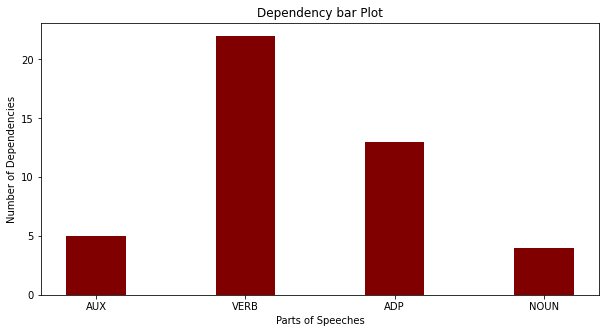

In [ ]:
print("Nouns mostly depends on verbs")
Plot_dep(df["NOUN_dep"][0])

Adjectives mostly depends on Nouns


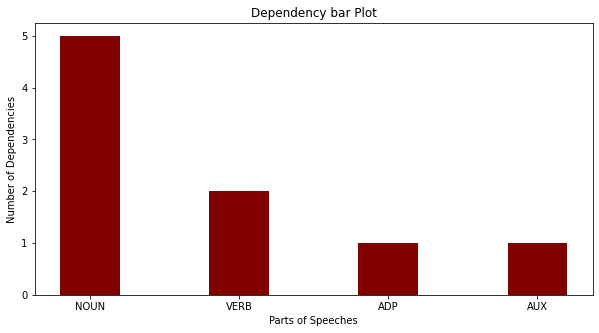

In [ ]:
print("Adjectives mostly depends on Nouns")
Plot_dep(df["ADJ_dep"][0])

Verbs mostly depends on other verbs


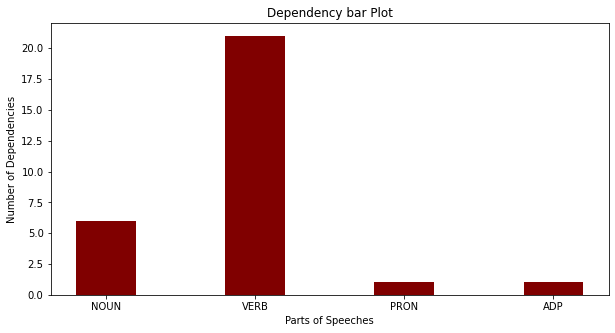

In [ ]:
print("Verbs mostly depends on other verbs")
Plot_dep(df["VERB_dep"][0])

In [ ]:
# Generate Mad Lib Problems

def generate_mad_lib(text,l):
  doc = nlp(text)
  l = random.sample(range(0, len(doc)-1), int(len(l)/3))
  for i in range(len(doc)):
    if i in l:
      print("_____", end = " ")
    else:
     print(doc[i], end=" ")

  

In [ ]:
generate_mad_lib(df["story"][0],df["VRB_ind"][0])

There was once a young boy who had problem controlling his temper . 
 When he _____ angry , he would just say anything that came to his mind and hurt people . 
 So his father gave him a bag of nails and _____ hammer and said , “ Every time you get angry , hammer one nail into the fence in our backyard ” . 
 The first _____ days the boy hammered so many nails that _____ emptied half the bag . 
 Over the weeks , the number of nails he hammered to the fence reduced and gradually , his temper was much in control . 
 Then came a day when he did n’t lose his temper at all . His father asked him to _____ one nail each day that he manages not to lose his temper . 
 Finally , on the day the child was removing the last nail , his father says , “ You have done well , boy . 
 But do you see the holes in the wall ? The fence _____ never going to be the same , even after repainting . 
 Likewise , when _____ _____ mean things in anger , you will leave a scar in the person ’s mind , as the nails _____